## **[분산과 편차](https://towardsdatascience.com/a-visual-understanding-of-bias-and-variance-66179f16be32)**

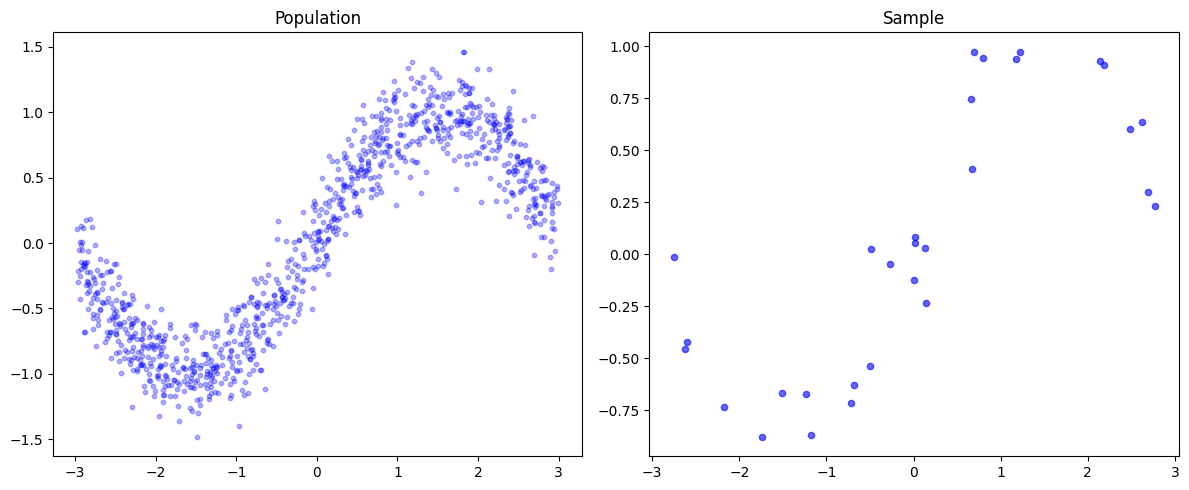

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate population dataset
x_population = np.random.uniform(-3, 3, 1000)
y_population = np.sin(x_population) + np.random.normal(0, 0.2, 1000)

# Take a random sample from the population
sample_size = 30
sample_indices = np.random.choice(range(1000), sample_size, replace=False)
x_sample = x_population[sample_indices]
y_sample = y_population[sample_indices]

# Plot population and sample datasets side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Population plot
axs[0].scatter(x_population, y_population, color='blue', alpha=0.3, s=10)
axs[0].set_title('Population')

# Sample plot
axs[1].scatter(x_sample, y_sample, color='blue', alpha=0.6, s=20)
axs[1].set_title('Sample')

# Display the plot
plt.tight_layout()
plt.show()


### 1st Degree Polynomial (Linear)
$$
f(x) = a_0 + a_1 x
$$

### 3rd Degree Polynomial (Cubic)
$$
f(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3
$$

### 5th Degree Polynomial
$$
f(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + a_4 x^4 + a_5 x^5
$$

### 9th Degree Polynomial
$$
f(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + a_4 x^4 + a_5 x^5 + a_6 x^6 + a_7 x^7 + a_8 x^8 + a_9 x^9
$$

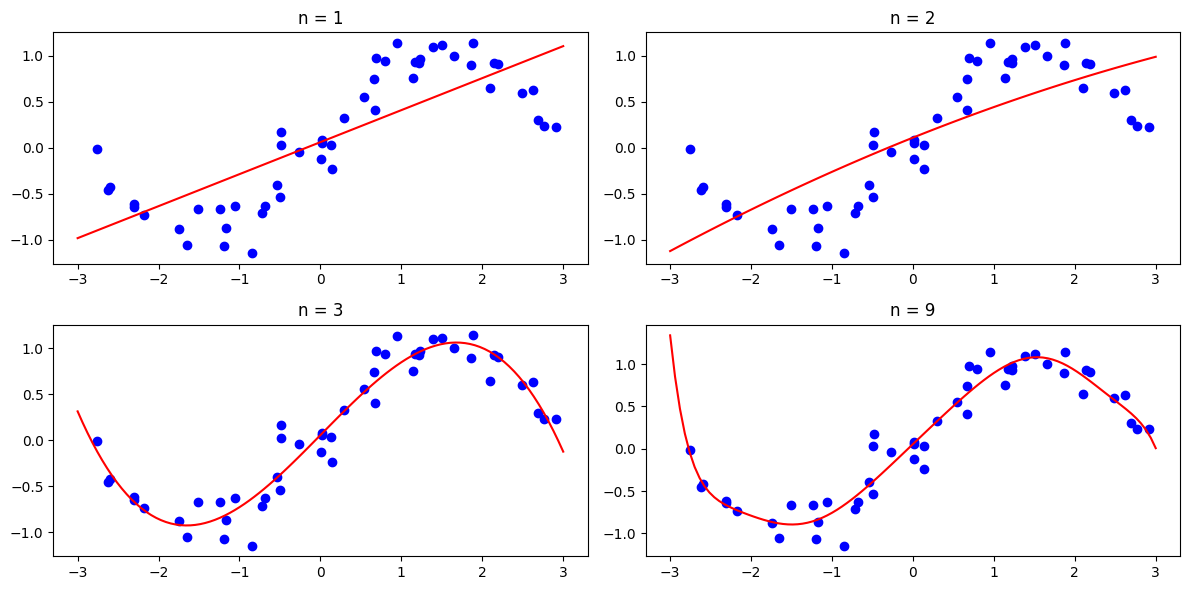

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample dataset
x_population = np.random.uniform(-3, 3, 1000)
y_population = np.sin(x_population) + np.random.normal(0, 0.2, 1000)

sample_size = 50
sample_indices = np.random.choice(range(1000), sample_size, replace=False)
x_sample = x_population[sample_indices]
y_sample = y_population[sample_indices]

# Create a range of x values for plotting polynomial curves
x_plot = np.linspace(-3, 3, 100).reshape(-1, 1)

# Plot polynomial fits for n = 1, 2, 3, and 10
degrees = [1, 2, 3, 9]
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

for i, degree in enumerate(degrees):
    # Transform features
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x_sample.reshape(-1, 1))

    # Fit the model
    model = LinearRegression()
    model.fit(x_poly, y_sample)

    # Predict using the model
    y_plot = model.predict(poly.transform(x_plot))

    # Plotting
    ax = axs[i // 2, i % 2]
    ax.scatter(x_sample, y_sample, color='blue')
    ax.plot(x_plot, y_plot, color='red')
    ax.set_title(f'n = {degree}')

plt.tight_layout()
plt.show()


## **What is variance?**

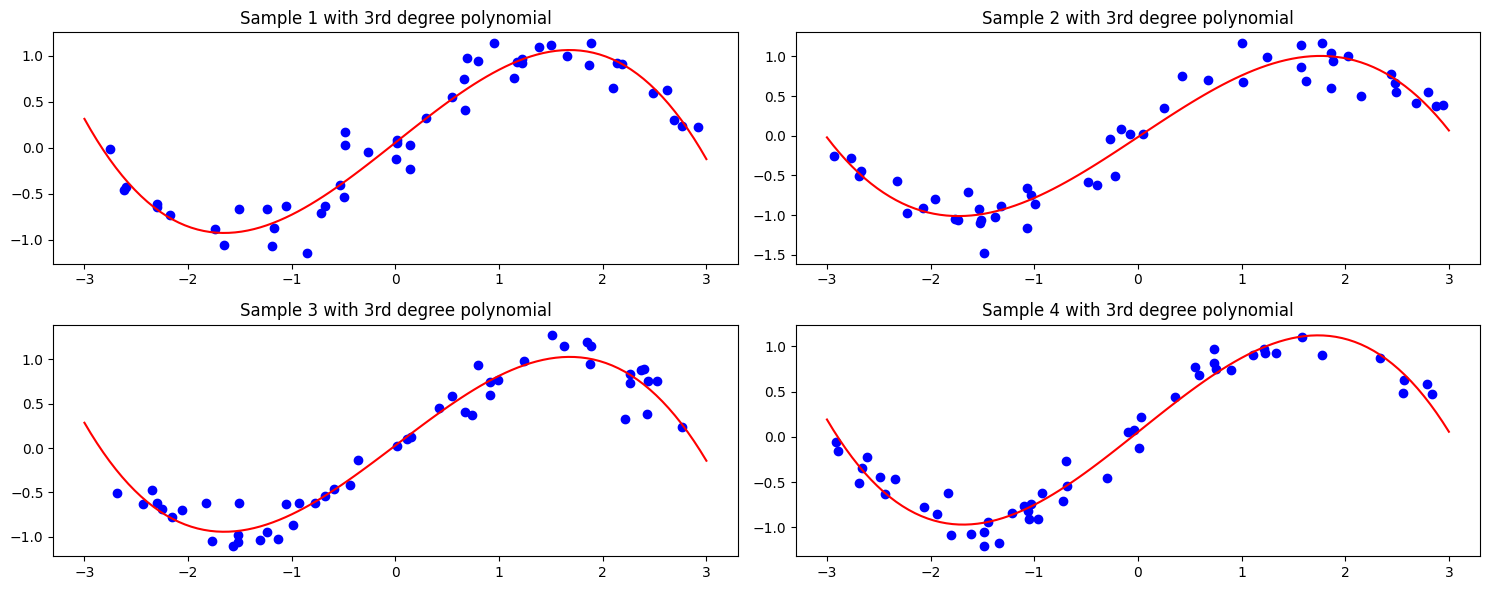

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate population dataset
x_population = np.random.uniform(-3, 3, 1000)
y_population = np.sin(x_population) + np.random.normal(0, 0.2, 1000)

# Create a range of x values for plotting polynomial curves
x_plot = np.linspace(-3, 3, 100).reshape(-1, 1)

# Number of samples to draw
num_samples = 4
sample_size = 50
degree = 3

# Plotting multiple samples with polynomial fit
fig, axs = plt.subplots(2, 2, figsize=(15, 6))

for i in range(num_samples):
    sample_indices = np.random.choice(range(1000), sample_size, replace=False)
    x_sample = x_population[sample_indices]
    y_sample = y_population[sample_indices]

    # Transform features
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x_sample.reshape(-1, 1))

    # Fit the model
    model = LinearRegression()
    model.fit(x_poly, y_sample)

    # Predict using the model
    y_plot = model.predict(poly.transform(x_plot))

    # Plotting
    ax = axs[i // 2, i % 2]
    ax.scatter(x_sample, y_sample, color='blue')
    ax.plot(x_plot, y_plot, color='red')
    ax.set_title(f'Sample {i+1} with 3rd degree polynomial')

plt.tight_layout()
plt.show()


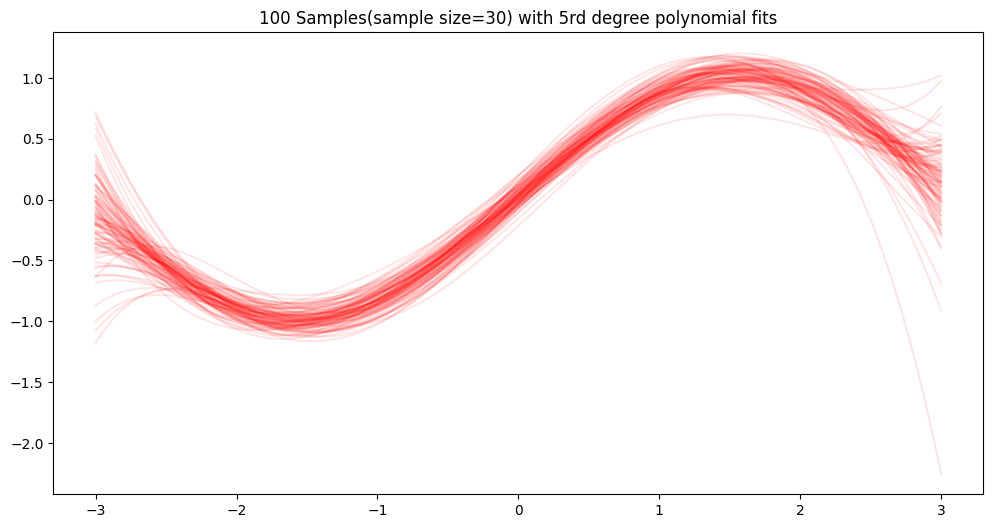

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate population dataset
x_population = np.random.uniform(-3, 3, 1000)
y_population = np.sin(x_population) + np.random.normal(0, 0.2, 1000)

# Create a range of x values for plotting polynomial curves
x_plot = np.linspace(-3, 3, 100).reshape(-1, 1)

# Number of samples to draw
num_samples = 100
sample_size = 30
degree = 5

# Plotting multiple samples with polynomial fit
plt.figure(figsize=(12, 6))

for i in range(num_samples):
    sample_indices = np.random.choice(range(1000), sample_size, replace=False)
    x_sample = x_population[sample_indices]
    y_sample = y_population[sample_indices]

    # Transform features
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x_sample.reshape(-1, 1))

    # Fit the model
    model = LinearRegression()
    model.fit(x_poly, y_sample)

    # Predict using the model
    y_plot = model.predict(poly.transform(x_plot))

    # Plotting
    plt.plot(x_plot, y_plot, color='red', alpha=0.1)

plt.title(f'{num_samples} Samples(sample size={sample_size}) with {degree}rd degree polynomial fits')
plt.show()


## **What is bias?**

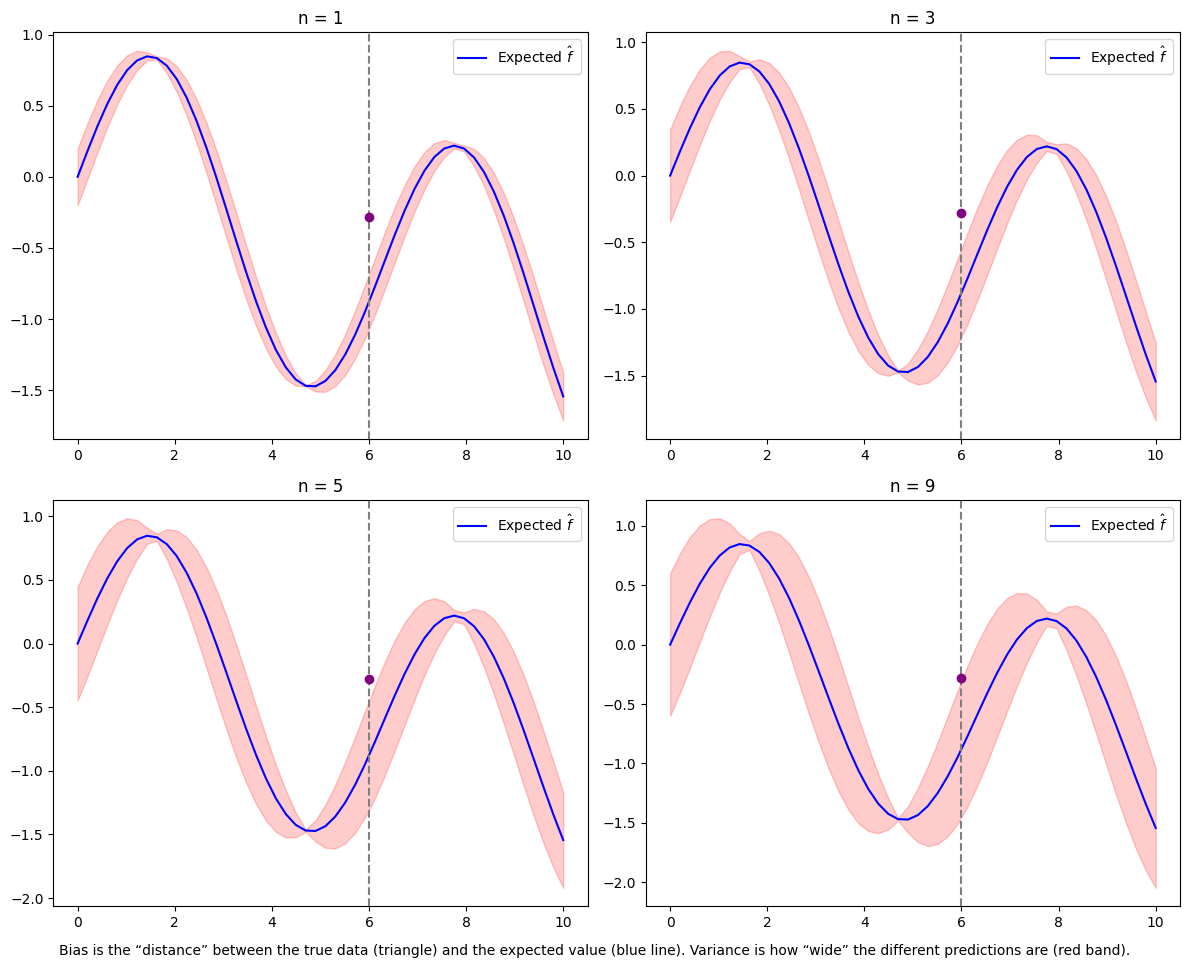

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the sample sizes
n_values = [1, 3, 5, 9]

# Define the x values
x = np.linspace(0, 10, 50)

# Define the true function and the expected value function
true_f = lambda x: np.sin(x)
expected_f = lambda x: np.sin(x) - 0.1 * x

# Define the variance function
variance = lambda x, n: 0.2 * np.sqrt(n) * np.abs(np.cos(x))

# Create the subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, n in enumerate(n_values):
    ax = axs[i]
    true_data = true_f(x)
    expected_data = expected_f(x)
    var = variance(x, n)

    ax.plot(x, expected_data, label='Expected $\hat{f}$', color='blue')
    ax.fill_between(x, expected_data - var, expected_data + var, color='red', alpha=0.2)
    ax.scatter([6], [true_f(6)], color='purple', zorder=5)
    ax.axvline(6, linestyle='--', color='gray')

    ax.set_title(f'n = {n}')
    ax.legend()

fig.text(0.5, 0.04, 'Bias is the “distance” between the true data (triangle) and the expected value (blue line). Variance is how “wide” the different predictions are (red band).', ha='center')
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()
